#### MIS 545 002 
#### Group 10
#### Project on determining water potability
#### Objective : To analyse and predict quality depending on the constituents of water
#### Dataset : https://github.com/MainakRepositor/Datasets/blob/master/water_potability.csv

In [183]:
# !pip install pydotplus
# !pip install graphviz

In [184]:
# 5. Load the packages you need. I strongly recommend you use the following packages.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import os
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import seaborn as sns
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Pritesh\\Downloads\\graphviz\\Graphviz\\bin'

%matplotlib inline

In [185]:
# 6. Change directory to your Lab09 project directory
os.chdir('C:\\Users\\Pritesh\\Desktop\\545_Data_Mining\\group-project')

In [186]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


#### Checking the features when water is not potable

In [187]:
# Potable = 1 and Not potable = 0

df[df['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


#### Checking the features when water is potable

In [188]:
df[df['Potability']==1].describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


#### Ensuring data types are consistent, however there are some null values in the dataset 

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [190]:
df.dtypes

# show the number of missing values for each column
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [191]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Axes: >

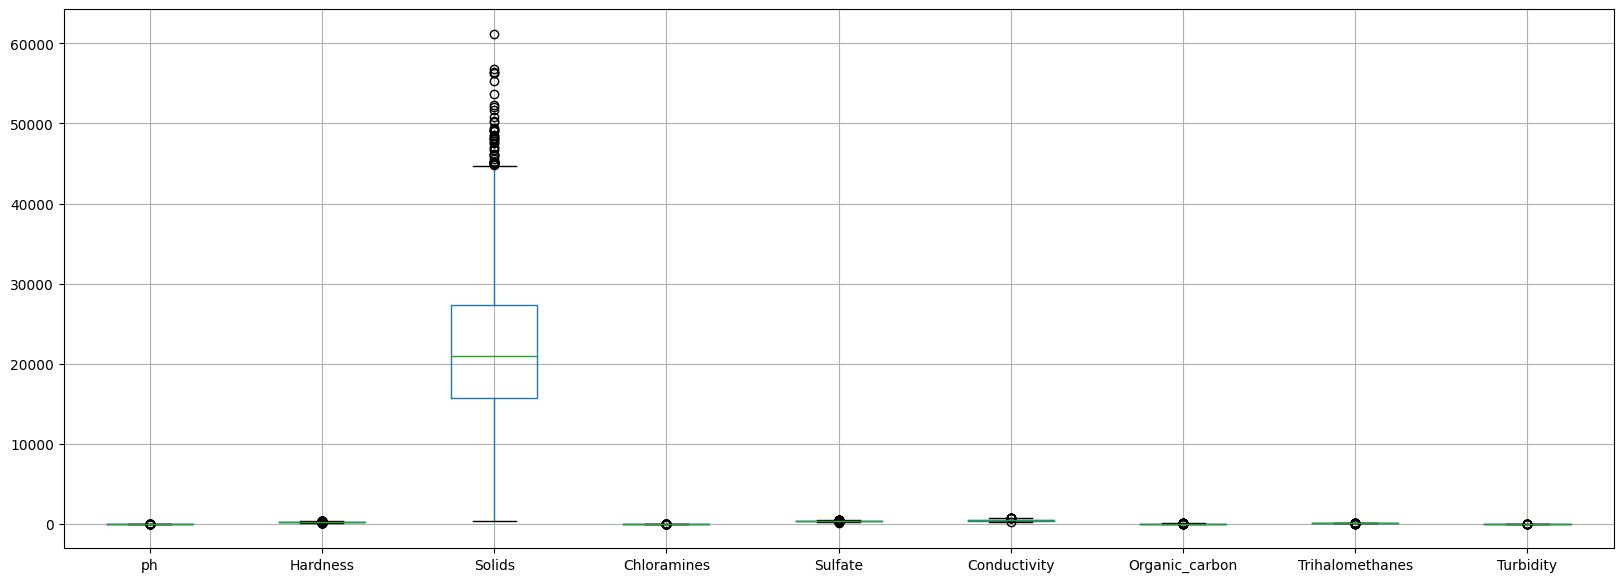

In [192]:
# create a box plot for each numeric variable
df.boxplot(column=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'], figsize=(20,7))

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>]], dtype=object)

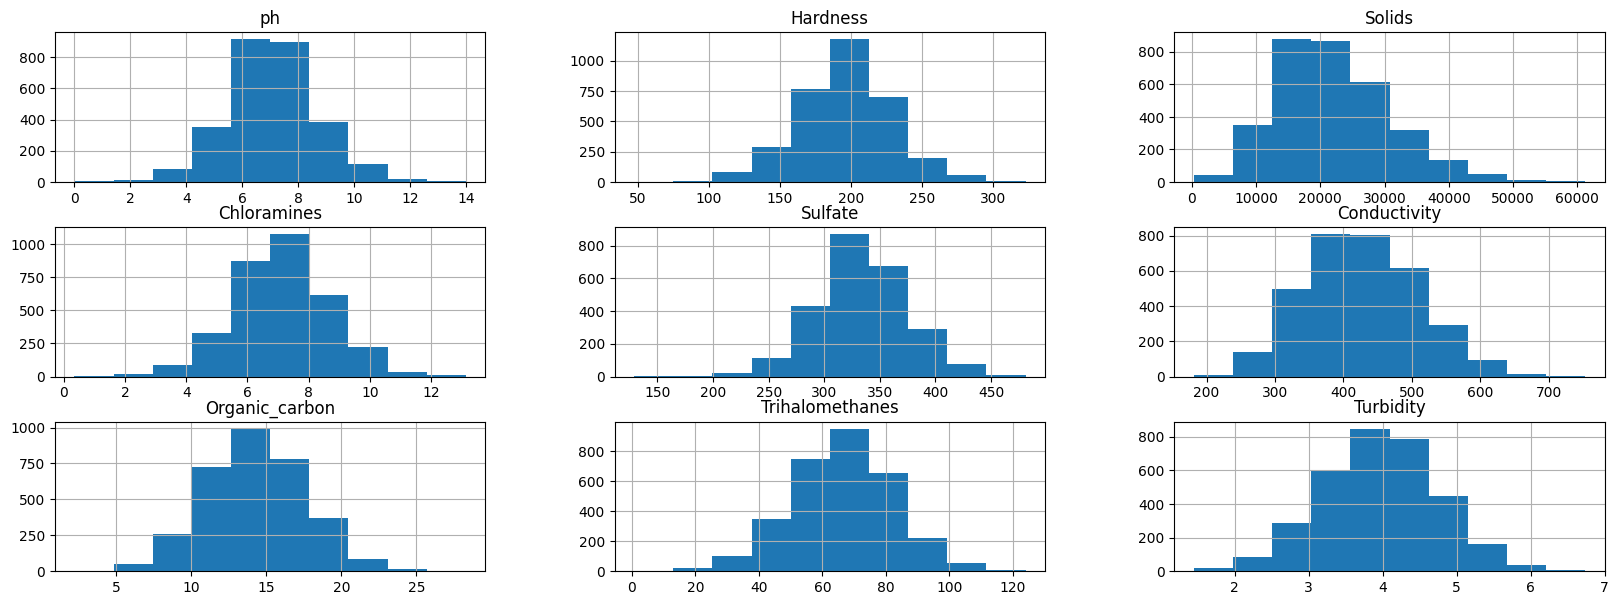

In [193]:
# create a histogram for each numeric variable
df.hist(column=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'], figsize=(20,7))


In [194]:
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


<Axes: >

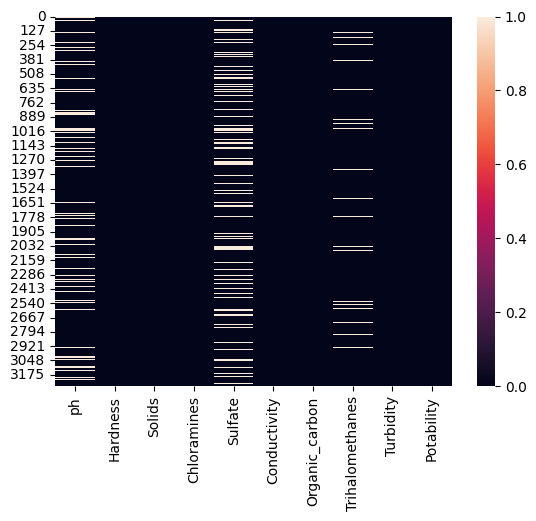

In [195]:
sns.heatmap(df.isnull())


#### Checking the correlation matrix to determine the relationship between the features

<Axes: >

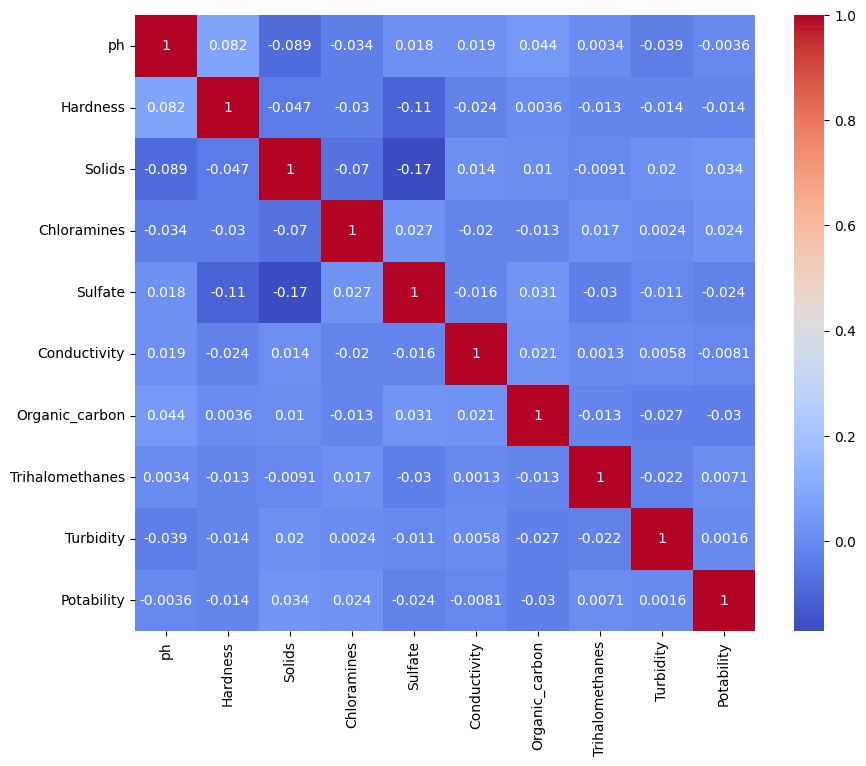

In [196]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

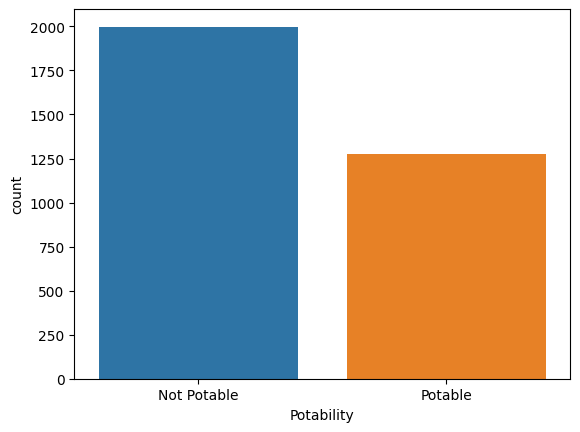

In [197]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [198]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### Performing pre-processing by filling the null values with mean

In [199]:
# fill ph columns with mean value
df['ph'].fillna(df['ph'].mean(), inplace=True)

# fill sulphate columns with mean value
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)

# fill Trihalomethanes columns with mean value
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

#### Ensuring the null values are filled

In [200]:

df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [201]:
#### X features - to predict y where y is potability

In [202]:
X = df.drop('Potability', axis=1)
y = df['Potability']


In [203]:
X.shape, y.shape


((3276, 9), (3276,))

#### Using standard scaler to scale the data

In [204]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [205]:
X = scaler.fit_transform(X)
X

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

#### Performing train test split, for now it is set to 30-70, in the following models, some cases will involve 20-80 split

In [206]:
# import train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

#### Running all the possible models to generate the best model

----
#### PLEASE NOTE : the following models are set to default mode, this does not mean that the model is the best model, the best model will be determined by the optimization, hypter paramter tuning and finally using the accuracy score in the following sections

In [207]:
import warnings
warnings.filterwarnings('ignore')
# Iteratively Run each model to help understand the approximate accuracy of each model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold


models =[
    ("LR", LogisticRegression(max_iter=1000)),
    ("KNN",KNeighborsClassifier(n_neighbors=10)),
    ("DTC", DecisionTreeClassifier()),
    ("GNB", GaussianNB()),
    ("BNB", BernoulliNB()),
    ("RF",RandomForestClassifier())
]

results = []
names = []

finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = accuracy_score(y_test, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,round(score*100, 2)))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults

[('RF', 67.34),
 ('KNN', 66.94),
 ('LR', 62.77),
 ('GNB', 62.77),
 ('BNB', 62.56),
 ('DTC', 59.92)]

#### Running each Model and performing optimizations to determine the best fit for the model

----

#### LOGISTIC REGRESSION

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve

In [209]:
# Logistic Regression
model_LR = LogisticRegression(max_iter=100)

In [210]:
model_LR.fit(X_train, y_train)


LogisticRegression()

In [211]:
pred_lg = model_LR.predict(X_test)


In [212]:
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.6276703967446592


In [213]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       615
           1       1.00      0.01      0.01       368

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983



<Axes: >

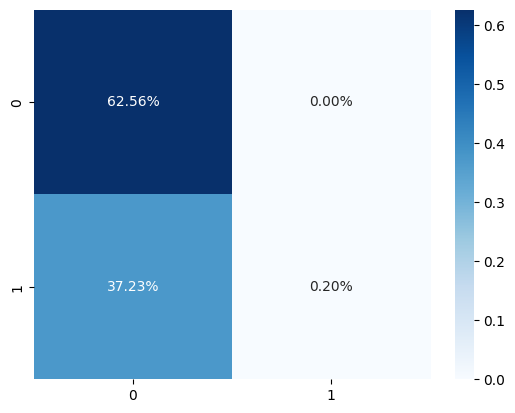

In [214]:
# add a confusion Matrix
import numpy as np
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt='0.2%', cmap = 'Blues')

##### Using randomOverSampler to balance the data

In [215]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(sampling_strategy = 1)
X_res_over, y_res_over = rus.fit_resample(X, y)

y_res_over.value_counts()




Potability
0    1998
1    1998
Name: count, dtype: int64

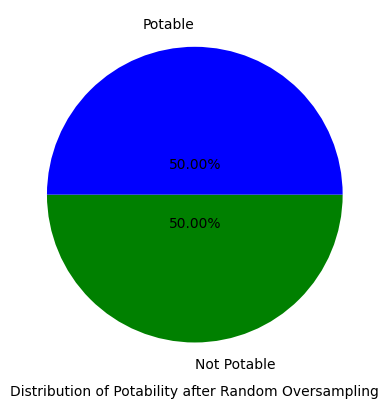

In [216]:
plt.pie(y_res_over.value_counts(),
        labels=['Not Potable','Potable'],colors=['Green', 'Blue'],autopct='%1.2f%%',pctdistance=0.2,startangle=0,
        labeldistance=1.15,radius=1,counterclock=False,center=(0, 0),normalize=True,data=df)
plt.xlabel("Distribution of Potability after Random Oversampling")
plt.show()

#### running the logistic model after RandomOverSampler

In [217]:
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_res_over, y_res_over, test_size = 0.2, random_state = 44)
Logistic_Regression_with_Balance = LogisticRegression()
Logistic_Regression_with_Balance.fit(X_bal_train, y_bal_train.values.ravel())
training_prediction = Logistic_Regression_with_Balance.predict(X_bal_train)
testing_prediction = Logistic_Regression_with_Balance.predict(X_bal_test)


In [218]:
# Training Metrics
training_accuracy = accuracy_score(y_bal_train, training_prediction)
training_f1 = f1_score(y_bal_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_bal_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_bal_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_bal_test, testing_prediction)
testing_f1 = f1_score(y_bal_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_bal_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_bal_test, testing_prediction, average = 'weighted')

print('Logistic Regression')
print('\n')


print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Logistic Regression




Testing Model Performance Check
Accuracy Score : 0.5000
F1 Score : 0.5000
Precision Score : 0.5004
Recall Score : 0.5000


#### Using SMOTE to balance the data

In [219]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

y_smote.value_counts()

Potability
0    1998
1    1998
Name: count, dtype: int64

In [220]:
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 44)
Logistic_Regression_with_SMOTE = LogisticRegression()
Logistic_Regression_with_SMOTE.fit(X_bal_train, y_bal_train.values.ravel())
training_prediction = Logistic_Regression_with_SMOTE.predict(X_bal_train)
testing_prediction = Logistic_Regression_with_SMOTE.predict(X_bal_test)


# Training Metrics
training_accuracy = accuracy_score(y_bal_train, training_prediction)
training_f1 = f1_score(y_bal_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_bal_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_bal_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_bal_test, testing_prediction)
testing_f1 = f1_score(y_bal_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_bal_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_bal_test, testing_prediction, average = 'weighted')

print('Logistic Regression')
print('\n')

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))


Logistic Regression




Testing Model Performance Check
Accuracy Score : 0.5038
F1 Score : 0.5034
Precision Score : 0.5047
Recall Score : 0.5038


----

#### K-Nearest Neighbors 

In [221]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train.values.ravel())
training_prediction = knn.predict(X_train)
testing_prediction = knn.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))




Testing Model Performance Check
Accuracy Score : 0.6653
F1 Score : 0.6104
Precision Score : 0.6627
Recall Score : 0.6653


In [222]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, testing_prediction))


              precision    recall  f1-score   support

           0       0.67      0.93      0.78       615
           1       0.66      0.22      0.33       368

    accuracy                           0.67       983
   macro avg       0.66      0.58      0.55       983
weighted avg       0.66      0.67      0.61       983



#### Determining the best K using by checking RMSE scores across different K values
 

RMSE value for k=  1 is: 0.6386978105365089
RMSE value for k=  2 is: 0.5590738599459582
RMSE value for k=  3 is: 0.5269926578658923
RMSE value for k=  4 is: 0.5083859324942888
RMSE value for k=  5 is: 0.49353913205827793
RMSE value for k=  6 is: 0.48344937277087596
RMSE value for k=  7 is: 0.48100074914716473
RMSE value for k=  8 is: 0.4788076227178683
RMSE value for k=  9 is: 0.47392875772908627
RMSE value for k=  10 is: 0.47345615684208664
RMSE value for k=  11 is: 0.47297335114299555
RMSE value for k=  12 is: 0.4695726504589072
RMSE value for k=  13 is: 0.46810417159760753
RMSE value for k=  14 is: 0.4695615971392927
RMSE value for k=  15 is: 0.4675619953647198
RMSE value for k=  16 is: 0.4663287330669482
RMSE value for k=  17 is: 0.4656629937478893
RMSE value for k=  18 is: 0.46531410075696383
RMSE value for k=  19 is: 0.4645172000435663
RMSE value for k=  20 is: 0.4640427857636929
RMSE value for k=  21 is: 0.4633496115934614
RMSE value for k=  22 is: 0.46333860526007725
RMSE value

<Axes: >

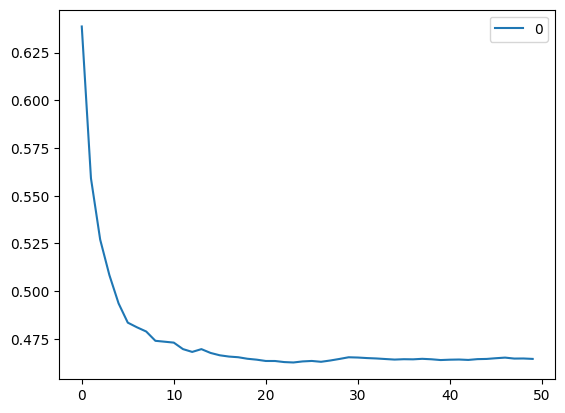

In [223]:
# plot KNN using matplotlib 
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

# determine best k
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

# plot
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

#### unable to determine the best K
#### to help determine the best K, it is important to ensure a different search criteria 
#### Hence, using GridSearchCV to determine the best K

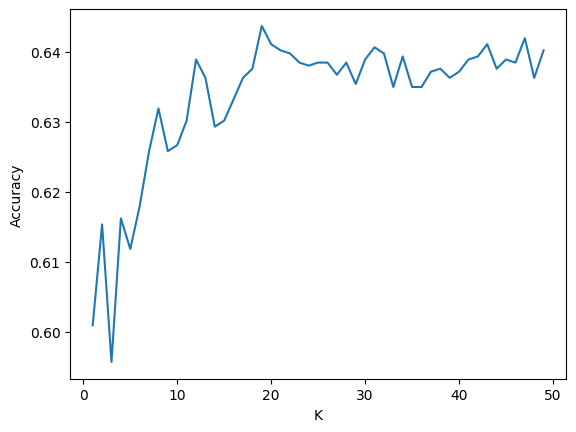

In [224]:
# Define the parameter grid for grid search
param_grid = {'n_neighbors': range(1, 50)}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter (K) from the grid search
best_k = grid_search.best_params_['n_neighbors']

# plot best K
plt.plot(range(1, 50), grid_search.cv_results_['mean_test_score'])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

#### It is observed that the best K is 20, given the accuracy peaks at 0.65

In [225]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train.values.ravel())
training_prediction = knn.predict(X_train)
testing_prediction = knn.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))




Testing Model Performance Check
Accuracy Score : 0.6653
F1 Score : 0.6104
Precision Score : 0.6627
Recall Score : 0.6653


---

#### Random Forest
----


#### Using Random Forest to determine the best features
#### Setting default Random Forest where n_estimators is set to 100 trees

In [226]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train.values.ravel())
training_prediction = Random_Forest.predict(X_train)
testing_prediction = Random_Forest.predict(X_test) 

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))




Testing Model Performance Check
Accuracy Score : 0.6775
F1 Score : 0.6545
Precision Score : 0.6655
Recall Score : 0.6775


#### Checking if Randomized search CV can help determine the best parameters

In [227]:
# optmizing random forest classifier using random Search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

# Get the best parameters
rf_random.best_params_

# Use the best parameters in the model
best_random = rf_random.best_estimator_

# Make predictions using the best parameters
training_prediction = best_random.predict(X_train)
testing_prediction = best_random.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
# print(training_accuracy)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')

training_precision = precision_score(y_train, training_prediction, average = 'weighted')

training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
print(testing_accuracy)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')

testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')

testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.6785350966429298


In [228]:
print(testing_accuracy)

0.6785350966429298


#### Using Grid Search CV to determine the best parameters

In [229]:
# optimize Random Forest using Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [10, 20, 30],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters
grid_search.best_params_

# Use the best parameters in the model
best_grid = grid_search.best_estimator_

# Make predictions using the best parameters
training_prediction = best_grid.predict(X_train)
testing_prediction = best_grid.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')

training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')

testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))


Fitting 3 folds for each of 162 candidates, totalling 486 fits




Testing Model Performance Check
Accuracy Score : 0.6857
F1 Score : 0.6534
Precision Score : 0.6800
Recall Score : 0.6857


---

#### Decision Tree 

In [230]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Pritesh\\Downloads\\graphviz\\Graphviz\\bin'

%matplotlib inline

#### Using Random Forest with Entropy criteria to determine the best features

In [231]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(max_depth = 5, criterion='entropy')
clf = Decision_Tree.fit(X_train, y_train.values.ravel())
training_prediction = Decision_Tree.predict(X_train)
testing_prediction = Decision_Tree.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))



Testing Model Performance Check
Accuracy Score 0.6511
F1 Score 0.5903
Precision Score 0.6382
Recall Score : 0.6511


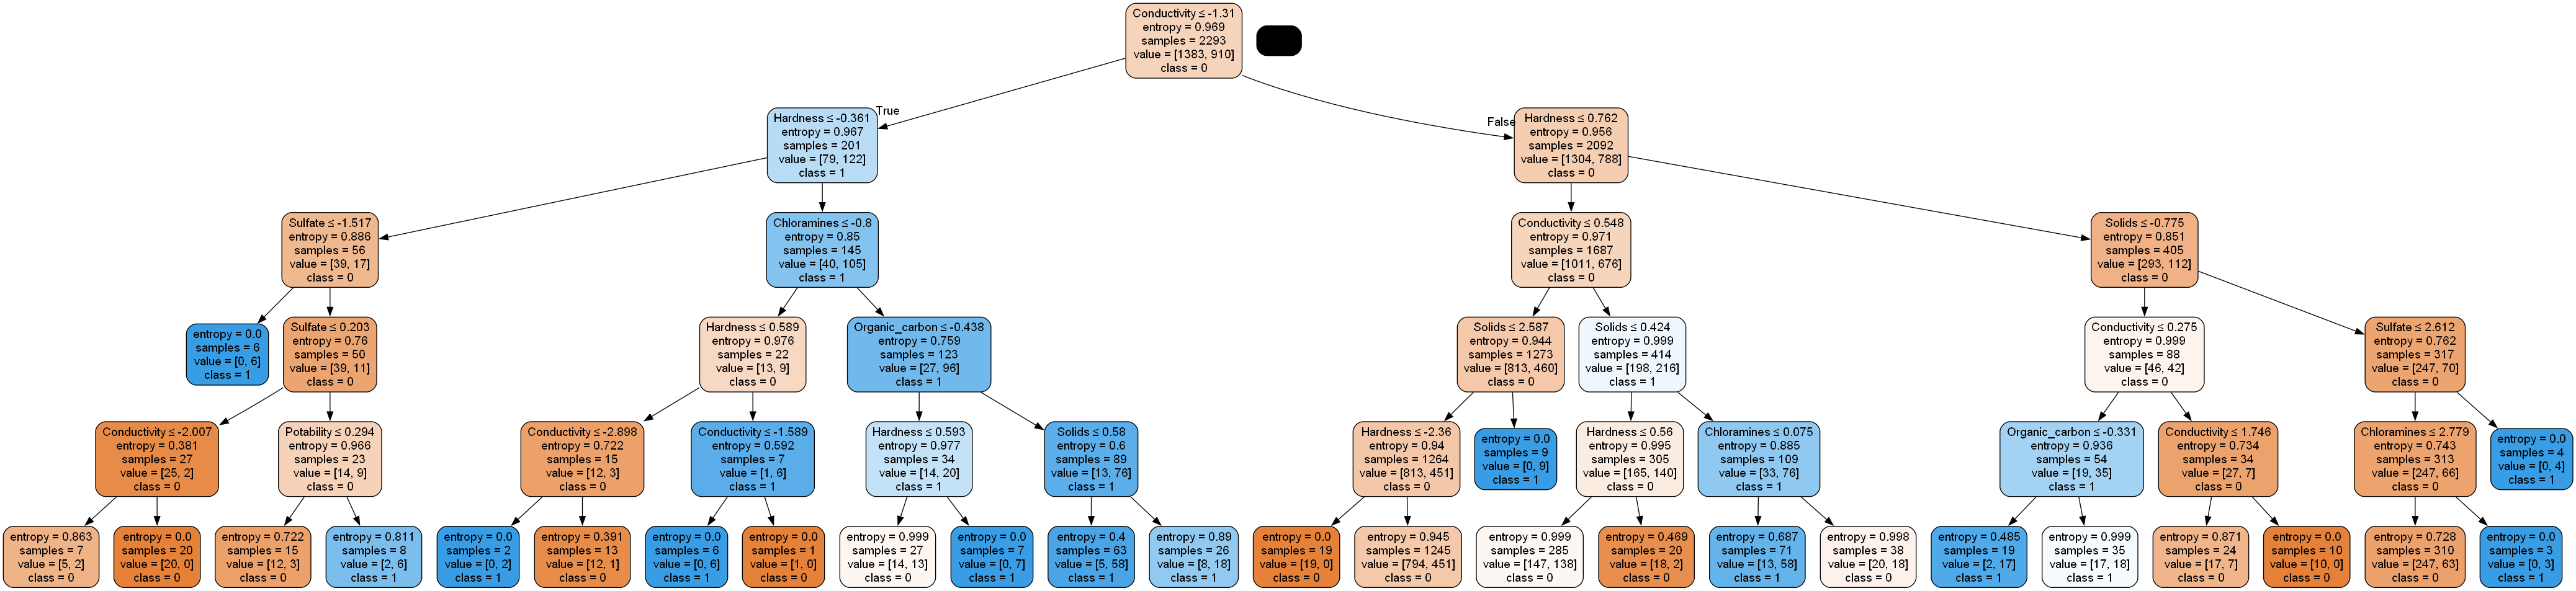

In [232]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = df.columns[1:10],
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT_with_entropy.png')
Image(graph.create_png())

#### Using Random Forest with GINI criteria to determine the best features

In [233]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(max_depth = 5, criterion='gini')
dt_gini = Decision_Tree.fit(X_train, y_train.values.ravel())
training_prediction = Decision_Tree.predict(X_train)
testing_prediction = Decision_Tree.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))



Testing Model Performance Check
Accuracy Score 0.6694
F1 Score 0.6127
Precision Score 0.6726
Recall Score : 0.6694


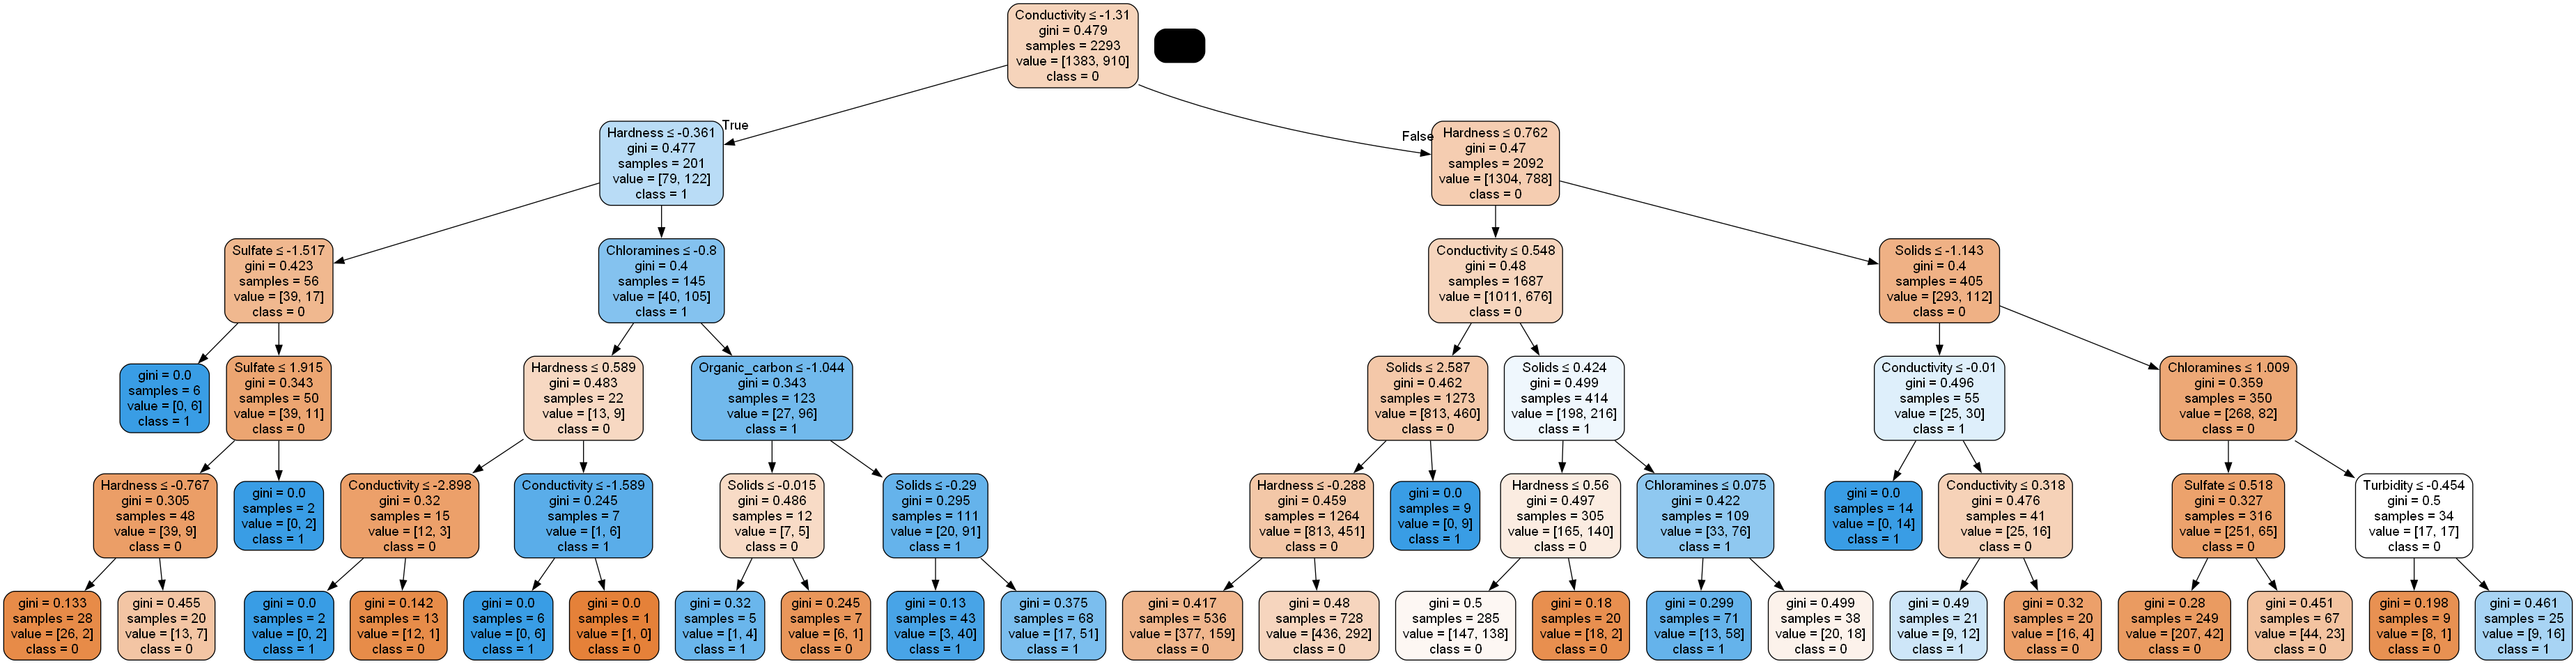

In [234]:
dot_data = StringIO()
export_graphviz(dt_gini, 
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = df.columns[1:10],
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT_with_gini.png')
Image(graph.create_png())

----

##### Running Gaussian Naive Bayes which is a probabilistic model

In [235]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train.values.ravel())
training_prediction = NB.predict(X_train)
testing_prediction = NB.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('Gaussian Naive Bayes')
print('\n')

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))


Gaussian Naive Bayes




Testing Model Performance Check
Accuracy Score : 0.6277
F1 Score : 0.6127
Precision Score : 0.6726
Recall Score : 0.6694


#### An attempt to optimize RandomizedSearchCV for Gaussian Naive Bayes

In [236]:
# optimize Naive Bayes
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

# Create the random grid
random_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
nb = GaussianNB()

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
nb_random = RandomizedSearchCV(estimator = nb,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

# Fit the random search model
nb_random.fit(X_train, y_train.values.ravel())

# Get the best parameters
nb_random.best_params_
print(nb_random.best_params_)
# Use the best parameters in the model
best_random = nb_random.best_estimator_

# Make predictions using the best parameters
training_prediction = best_random.predict(X_train)
testing_prediction = best_random.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)

training_f1 = f1_score(y_train, training_prediction, average = 'weighted')

training_precision = precision_score(y_train, training_prediction, average = 'weighted')

training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)

testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')

testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')

testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print("testing_accuracy ", testing_accuracy)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'var_smoothing': 0.08111308307896872}
testing_accuracy  0.62970498474059


#### Using Bernoulli Naive Bayes which is again a probabilistic model

In [237]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(X_train, y_train.values.ravel())
training_prediction = NB.predict(X_train)
testing_prediction = NB.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('Bernoulli Naive Bayes')
print('\n')

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))


Bernoulli Naive Bayes




Testing Model Performance Check
Accuracy Score : 0.6256
F1 Score : 0.5789
Precision Score : 0.5991
Recall Score : 0.6297
